In [1]:
from PIL import Image
import requests
from io import BytesIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine
from plotnine import *
import os, sys, gc
from tqdm.notebook import tqdm

In [2]:
plt.style.use('ggplot')

In [3]:
path = './t-academy-data/'

In [4]:
books = pd.read_csv(path + 'books.csv')
book_tags = pd.read_csv(path + 'book_tags.csv')
ratings = pd.read_csv(path + 'ratings.csv')
tags = pd.read_csv(path + 'tags.csv')
to_read = pd.read_csv(path + 'to_read.csv')

In [5]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [6]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

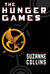

In [7]:
img = requests.get(books['small_image_url'].values[0])
Image.open(BytesIO(img.content))

In [8]:
books = books[['book_id', 'authors', 'title', 'ratings_count', 'average_rating', 'language_code']].reset_index(drop=True)

In [9]:
books

,book_id,authors,title,ratings_count,average_rating,language_code
0,2767052,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",4780653,4.34,eng
1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4602479,4.44,eng
2,41865,Stephenie Meyer,"Twilight (Twilight, #1)",3866839,3.57,en-US
3,2657,Harper Lee,To Kill a Mockingbird,3198671,4.25,eng
4,4671,F. Scott Fitzgerald,The Great Gatsby,2683664,3.89,eng
...,...,...,...,...,...,...
9995,7130616,Ilona Andrews,"Bayou Moon (The Edge, #2)",17204,4.09,eng
9996,208324,Robert A. Caro,"Means of Ascent (The Years of Lyndon Johnson, #2)",12582,4.25,eng
9997,77431,Patrick O'Brian,The Mauritius Command,9421,4.35,eng
9998,8565083,Peggy Orenstein,Cinderella Ate My Daughter: Dispatches from th...,11279,3.65,eng


In [10]:
agg = books.groupby('authors')['authors'].agg({'count'})
agg

,count
authors,
A. Manette Ansay,1
A. Meredith Walters,2
"A.A. Milne, Ernest H. Shepard",6
A.C. Gaughen,1
A.G. Howard,2
...,...
منى المرشود,1
نور عبدالمجيد,1
ياسر حارب,1


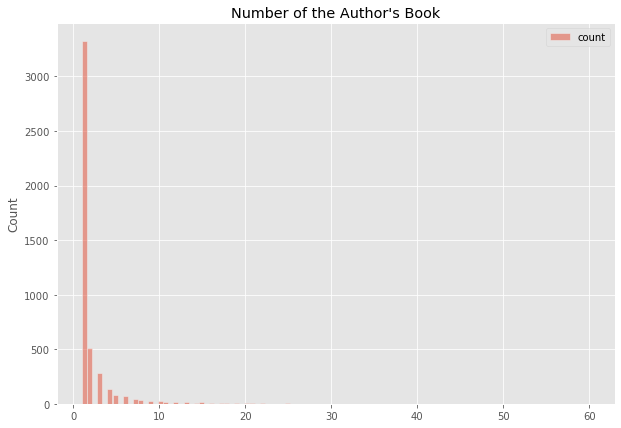

In [11]:
plt.figure(figsize=(10,7))
sns.histplot(agg, bins=100)
plt.title("Number of the Author's Book")
plt.show()

In [12]:
print(books['book_id'].nunique())
print(books['authors'].nunique())
pd.DataFrame(agg['count'].describe()).T

10000
4664


,count,mean,std,min,25%,50%,75%,max
count,4664.0,2.144082,3.414442,1.0,1.0,1.0,2.0,60.0


In [13]:
books

,book_id,authors,title,ratings_count,average_rating,language_code
0,2767052,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",4780653,4.34,eng
1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4602479,4.44,eng
2,41865,Stephenie Meyer,"Twilight (Twilight, #1)",3866839,3.57,en-US
3,2657,Harper Lee,To Kill a Mockingbird,3198671,4.25,eng
4,4671,F. Scott Fitzgerald,The Great Gatsby,2683664,3.89,eng
...,...,...,...,...,...,...
9995,7130616,Ilona Andrews,"Bayou Moon (The Edge, #2)",17204,4.09,eng
9996,208324,Robert A. Caro,"Means of Ascent (The Years of Lyndon Johnson, #2)",12582,4.25,eng
9997,77431,Patrick O'Brian,The Mauritius Command,9421,4.35,eng
9998,8565083,Peggy Orenstein,Cinderella Ate My Daughter: Dispatches from th...,11279,3.65,eng


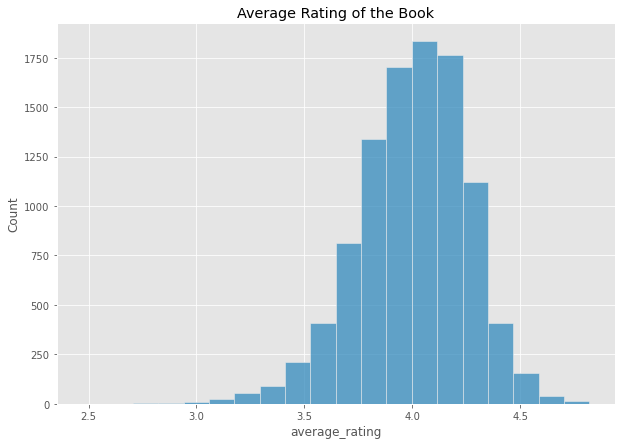

In [14]:
plt.figure(figsize=(10,7))
sns.histplot(books['average_rating'], bins=20)
plt.title("Average Rating of the Book")
plt.show()

In [15]:
len(books[books['average_rating'] <= 3])

14

In [16]:
books.sort_values(by='average_rating', ascending=False).head()

,book_id,authors,title,ratings_count,average_rating,language_code
3627,24812,Bill Watterson,The Complete Calvin and Hobbes,28900,4.82,eng
3274,8,"J.K. Rowling, Mary GrandPré","Harry Potter Boxed Set, Books 1-5 (Harry Potte...",33220,4.77,eng
861,17332218,Brandon Sanderson,"Words of Radiance (The Stormlight Archive, #2)",73572,4.77,eng
8853,95602,Francine Rivers,Mark of the Lion Trilogy,9081,4.76,en-US
7946,5031805,"Anonymous, Lane T. Dennis, Wayne A. Grudem",ESV Study Bible,8953,4.76,eng


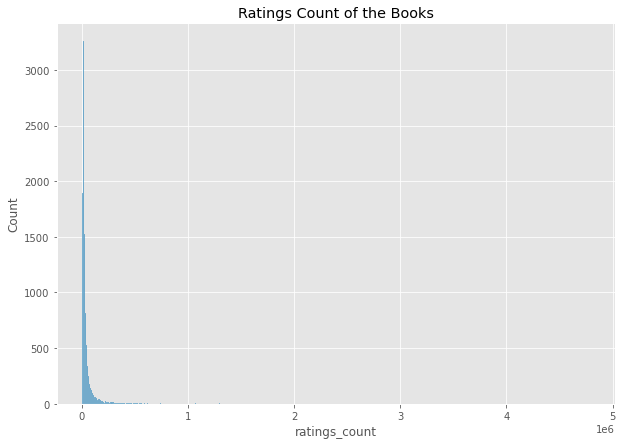

In [17]:
plt.figure(figsize=(10,7))
sns.histplot(books['ratings_count'], bins=500)
plt.title("Ratings Count of the Books")
plt.show()

In [18]:
pd.DataFrame(books['ratings_count'].describe()).T

,count,mean,std,min,25%,50%,75%,max
ratings_count,10000.0,54001.2351,157369.956436,2716.0,13568.75,21155.5,41053.5,4780653.0


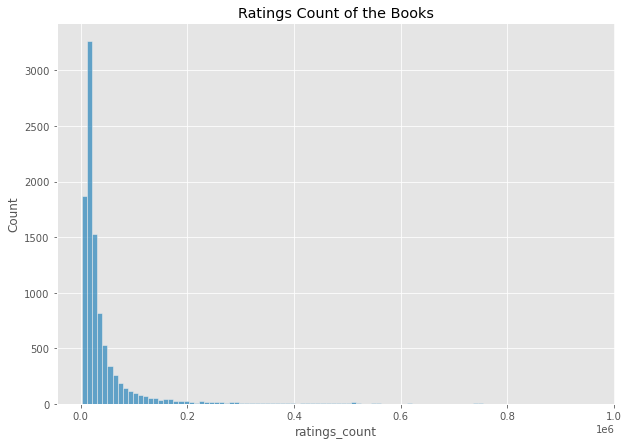

In [19]:
plt.figure(figsize=(10,7))
sns.histplot(books[books['ratings_count'] < 1000000]['ratings_count'], bins=100)
plt.title("Ratings Count of the Books")
plt.show()

In [20]:
books.sort_values(by='ratings_count', ascending=False).head()

,book_id,authors,title,ratings_count,average_rating,language_code
0,2767052,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",4780653,4.34,eng
1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4602479,4.44,eng
2,41865,Stephenie Meyer,"Twilight (Twilight, #1)",3866839,3.57,en-US
3,2657,Harper Lee,To Kill a Mockingbird,3198671,4.25,eng
4,4671,F. Scott Fitzgerald,The Great Gatsby,2683664,3.89,eng


In [21]:
agg = pd.DataFrame(books['language_code'].value_counts())
# agg.columns = ['language_code', 'count']
agg.head()

,language_code
eng,6341
en-US,2070
en-GB,257
ara,64
en-CA,58


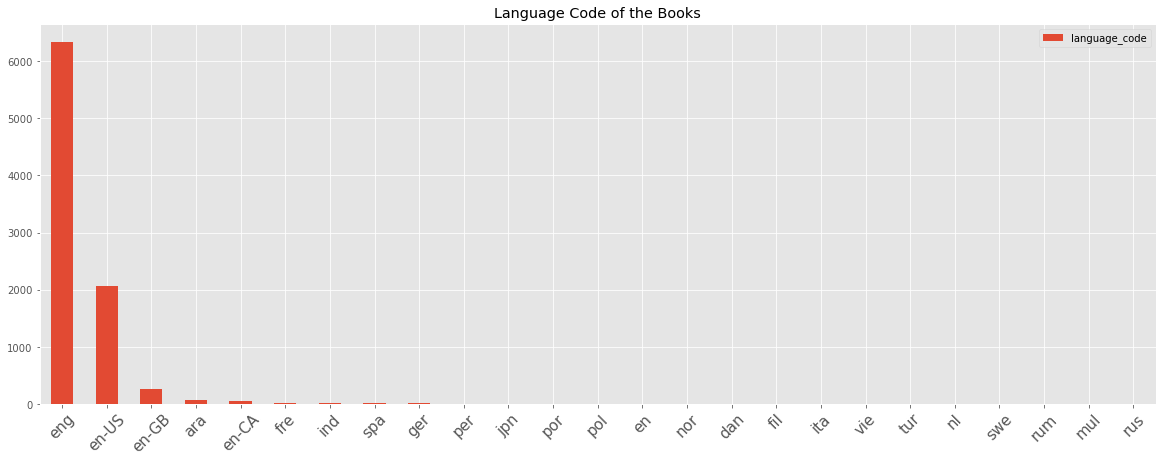

In [22]:
agg.plot(kind='bar', figsize=(20,7))
plt.title("Language Code of the Books")
plt.xticks(rotation=45, fontsize=15)
plt.show()

In [23]:
books['language_code'].unique()

array(['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'nl', 'ara',
       'por', 'ger', 'nor', 'jpn', 'en', 'vie', 'ind', 'pol', 'tur',
       'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'],
      dtype=object)

In [24]:
books.isnull().sum()

book_id              0
authors              0
title                0
ratings_count        0
average_rating       0
language_code     1084
dtype: int64

In [25]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [26]:
len(set(ratings['book_id'].unique()).difference(set(books['book_id'].unique())))

9188

In [27]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [28]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [29]:
book_tags = pd.merge(tags, book_tags, how='left', on='tag_id')
book_tags

,tag_id,tag_name,goodreads_book_id,count
0,0,-,665,3
1,0,-,81176,5
2,0,-,147074,2
3,0,-,2983489,3
4,0,-,6713071,4
...,...,...,...,...
999907,34248,Ｆａｖｏｒｉｔｅｓ,8520610,374
999908,34248,Ｆａｖｏｒｉｔｅｓ,9361589,3765
999909,34249,Ｍａｎｇａ,248871,222
999910,34250,ＳＥＲＩＥＳ,28866,24


In [30]:
agg = book_tags.groupby(['tag_name'])['count'].agg({'sum'}).sort_values(by='sum', ascending=False)
agg

,sum
tag_name,
to-read,140718761
currently-reading,7507958
favorites,4503173
fiction,3688819
fantasy,3548157
...,...
american-20c,1
comics-later-volumes,1
paused-and-not-intending-to-resume,1


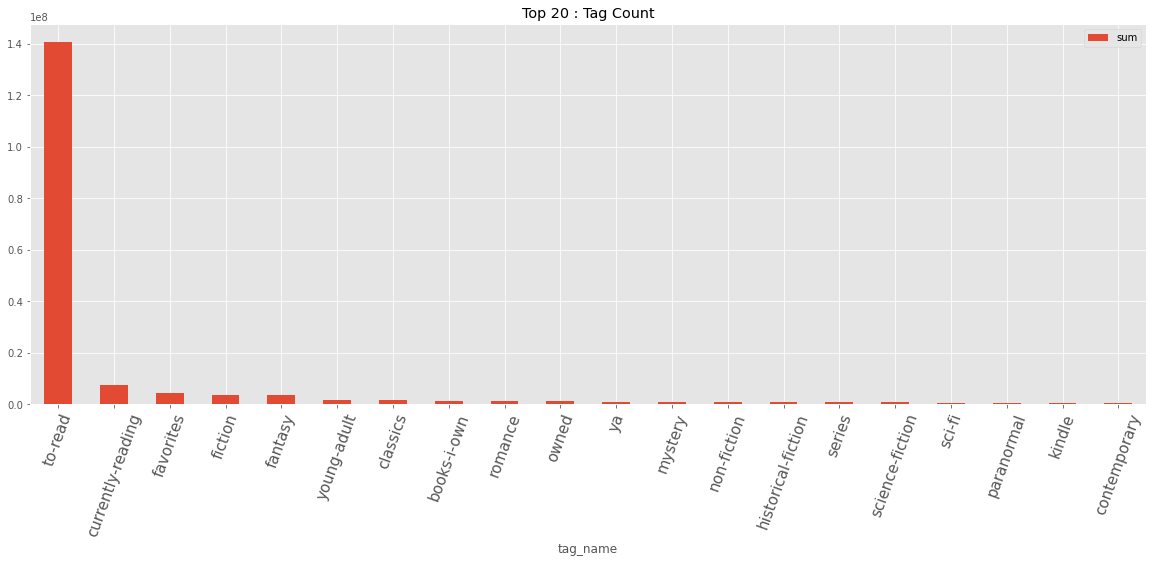

In [31]:
agg[:20].plot(kind='bar', figsize=(20,7))
plt.title("Top 20 : Tag Count")
plt.xticks(fontsize=15, rotation=70)
plt.show()

In [32]:
pd.DataFrame(agg['sum'].describe()).T

,count,mean,std,min,25%,50%,75%,max
sum,34252.0,6097.490716,762709.169868,-1.0,3.0,10.0,52.0,140718761.0


In [33]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [34]:
agg = ratings.groupby(['user_id'])['book_id'].agg({'count'})
agg

,count
user_id,
1,3
2,3
3,2
4,3
5,5
...,...
53420,6
53421,8
53422,18


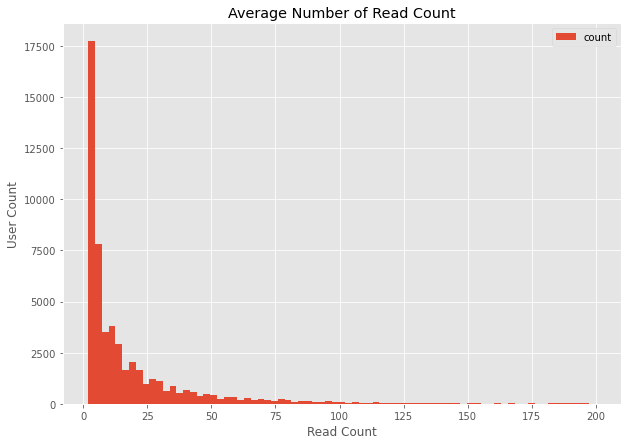

In [35]:
agg.plot(kind='hist', bins=75, figsize=(10,7))
plt.title("Average Number of Read Count")
plt.xlabel('Read Count')
plt.ylabel('User Count')
plt.show()

In [36]:
pd.DataFrame(agg['count'].describe()).T

,count,mean,std,min,25%,50%,75%,max
count,53424.0,18.376685,26.26869,2.0,3.0,8.0,22.0,200.0


In [37]:
agg = ratings.groupby(['book_id'])['book_id'].agg({'count'})
agg

,count
book_id,
1,100
2,100
3,100
4,100
5,100
...,...
9996,98
9997,89
9998,95


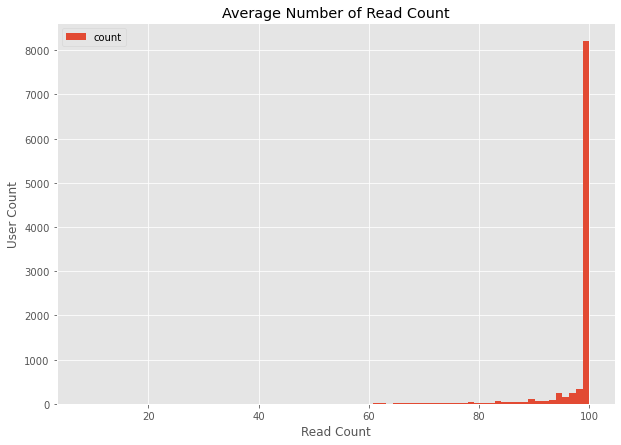

In [38]:
agg.plot(kind='hist', bins=75, figsize=(10,7))
plt.title("Average Number of Read Count")
plt.xlabel('Read Count')
plt.ylabel('User Count')
plt.show()

In [39]:
pd.DataFrame(agg['count'].describe()).T

,count,mean,std,min,25%,50%,75%,max
count,10000.0,98.1756,5.690167,8.0,99.0,100.0,100.0,100.0


In [40]:
books[books['book_id'].isin([1,2,3,4,5,6,7,8])]

,book_id,authors,title,ratings_count,average_rating,language_code
1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4602479,4.44,eng
17,5,"J.K. Rowling, Mary GrandPré, Rufus Beck",Harry Potter and the Prisoner of Azkaban (Harr...,1832823,4.53,eng
20,2,"J.K. Rowling, Mary GrandPré",Harry Potter and the Order of the Phoenix (Har...,1735368,4.46,eng
23,6,"J.K. Rowling, Mary GrandPré",Harry Potter and the Goblet of Fire (Harry Pot...,1753043,4.53,eng
26,1,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,1678823,4.54,eng
3274,8,"J.K. Rowling, Mary GrandPré","Harry Potter Boxed Set, Books 1-5 (Harry Potte...",33220,4.77,eng


In [41]:
ratings['user_id'].unique()

array([  314,   439,   588, ..., 43623, 24406, 27590])

In [42]:
ratings[(ratings['user_id'] == 314) & (ratings['book_id'].isin([1,2,3,4,5,6,7,8]))]

,book_id,user_id,rating
0,1,314,5
200,3,314,3
400,5,314,4
501,6,314,5


In [43]:
agg = ratings[ratings['book_id'].isin([1,2,3,4,5,6,7,8])].groupby(['user_id'])['book_id'].agg({'nunique'})
agg

,nunique
user_id,
173,1
314,4
439,3
588,3
725,1
...,...
52583,1
52740,1
53145,1


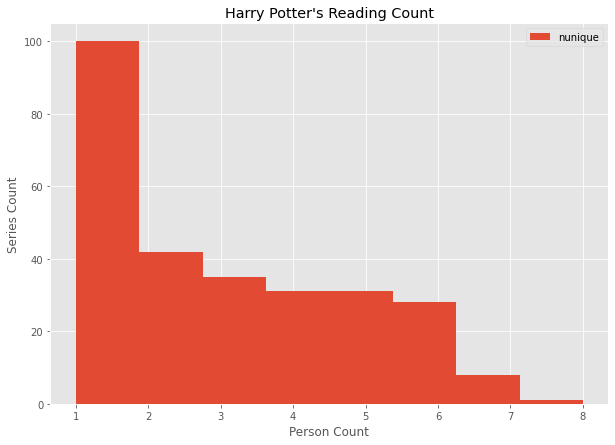

In [44]:
agg.plot(kind='hist', bins=8, figsize=(10,7))
plt.title("Harry Potter's Reading Count")
plt.xlabel('Person Count')
plt.ylabel('Series Count')
plt.show()

In [45]:
agg['nunique'].value_counts(normalize=True).reset_index().T

,0,1,2,3,4,5,6,7
index,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000
nunique,0.362319,0.152174,0.126812,0.112319,0.112319,0.101449,0.028986,0.003623


In [46]:
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [47]:
len(to_read)

912705

In [48]:
to_read['user_id'].nunique()

48871

In [49]:
agg = ratings.groupby(['user_id'])['book_id'].agg({'unique'}).reset_index()
agg.head()

,user_id,unique
0,1,"[1180, 4893, 6285]"
1,2,"[8034, 8855, 9762]"
2,3,"[9014, 9049]"
3,4,"[3273, 3469, 8464]"
4,5,"[4829, 6646, 6703, 7487, 8072]"


In [50]:
agg['train'] = agg['unique'].apply(lambda x: np.random.choice(x, len(x)//2))
agg.head()

,user_id,unique,train
0,1,"[1180, 4893, 6285]",[6285]
1,2,"[8034, 8855, 9762]",[8034]
2,3,"[9014, 9049]",[9014]
3,4,"[3273, 3469, 8464]",[3469]
4,5,"[4829, 6646, 6703, 7487, 8072]","[8072, 4829]"


In [53]:
test = []

for i in tqdm(range(0, agg.shape[0])):
    test_rec = list(set(agg.loc[i, 'unique']).difference(set(agg.loc[i, 'train'])))
    test.append(test_rec)
agg['test'] = test

  0%|          | 0/53424 [00:00<?, ?it/s]

In [54]:
agg

,user_id,unique,train,test
0,1,"[1180, 4893, 6285]",[6285],"[1180, 4893]"
1,2,"[8034, 8855, 9762]",[8034],"[9762, 8855]"
2,3,"[9014, 9049]",[9014],[9049]
3,4,"[3273, 3469, 8464]",[3469],"[8464, 3273]"
4,5,"[4829, 6646, 6703, 7487, 8072]","[8072, 4829]","[7487, 6646, 6703]"
...,...,...,...,...
53419,53420,"[4086, 4625, 5651, 6538, 9149, 9171]","[9171, 9171, 6538]","[4625, 5651, 9149, 4086]"
53420,53421,"[6076, 7278, 8194, 8513, 9254, 9334, 9498, 9727]","[6076, 9254, 9727, 9727]","[8513, 8194, 7278, 9334, 9498]"
53421,53422,"[1780, 1904, 2110, 2300, 2712, 3424, 3960, 407...","[4071, 4761, 5605, 3960, 3960, 1904, 3424, 788...","[4613, 6887, 7817, 5811, 1780, 4213, 7667, 875..."
53422,53423,"[4984, 8712]",[4984],[8712]


In [56]:
# train dataset 
train_map = agg[['user_id', 'train']]
train_map

,user_id,train
0,1,[6285]
1,2,[8034]
2,3,[9014]
3,4,[3469]
4,5,"[8072, 4829]"
...,...,...
53419,53420,"[9171, 9171, 6538]"
53420,53421,"[6076, 9254, 9727, 9727]"
53421,53422,"[4071, 4761, 5605, 3960, 3960, 1904, 3424, 788..."
53422,53423,[4984]


In [67]:
train_map_unnest = np.dstack(
    (
        np.repeat(train_map.user_id.values, list(map(len, train_map.train))),
        np.concatenate(train_map.train.values)
    )
)

In [78]:
train_map_unnest = pd.DataFrame(data=train_map_unnest[0], columns=train_map.columns)
train_map_unnest.head(7)

,user_id,train
0,1,6285
1,2,8034
2,3,9014
3,4,3469
4,5,8072
5,5,4829
6,6,8033


In [79]:
# test dataset 
test_map = agg[['user_id', 'test']]

# unnest tags
test_map_unnest = np.dstack(
    (
        np.repeat(test_map.user_id.values, list(map(len, test_map.test))), 
        np.concatenate(test_map.test.values)
    )
)

test_map_unnest = pd.DataFrame(data = test_map_unnest[0], columns = test_map.columns)
test_map_unnest.head()

,user_id,test
0,1,1180
1,1,4893
2,2,9762
3,2,8855
4,3,9049


In [80]:
train_map_unnest.columns = ['user_id', 'book_id']
test_map_unnest.columns = ['user_id', 'book_id']
train_map_unnest.to_csv("train.csv", index=False)
test_map_unnest.to_csv("test.csv", index=False)

## 정리
- 전체 책을 구매한 사용자는 53424명이고 책의 개수는 10000개
- 그 중 48871명이 장바구니에 책을 담아두었습니다.
- 평균적으로 작가당 책이 2권 이상은 됩니다.